<a href="https://colab.research.google.com/github/doyoung1122/24-2/blob/Introduction-of-A.I/Intro_AI_ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [ ]:
# Generate example data
# Parameters
np.random.seed(42)

n_data = 300
x0 = 1.5*randn(n_data)
x1 = 1.5*randn(n_data)

X= np.array([x0, x1]).T
# Check the shape

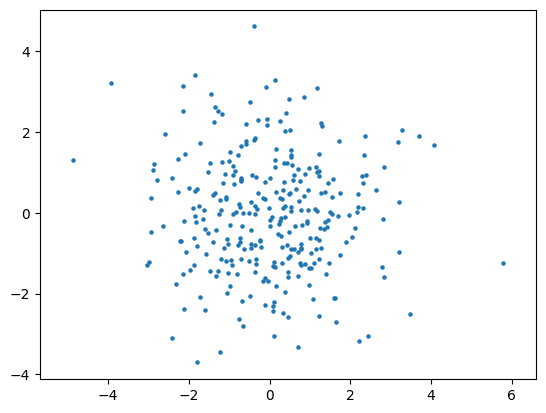

In [ ]:
plt.scatter(x0, x1, s=5)
plt.axis('equal')
plt.show()

In [ ]:
obj_function = lambda x: 3*x[:,0] * np.sin(3*x[:,1])

In [ ]:
y = obj_function(X) + 0.2 * randn(n_data) # Noise-added target value
y = y.reshape(-1,1)

In [ ]:
x_train = X[:int(n_data*0.6)]
y_train = y[:int(n_data*0.6)]

x_val = X[int(n_data*0.6):int(n_data*0.8)]
y_val = y[int(n_data*0.6):int(n_data*0.8)]

x_test = X[int(n_data*0.8):]
y_test = y[int(n_data*0.8):]


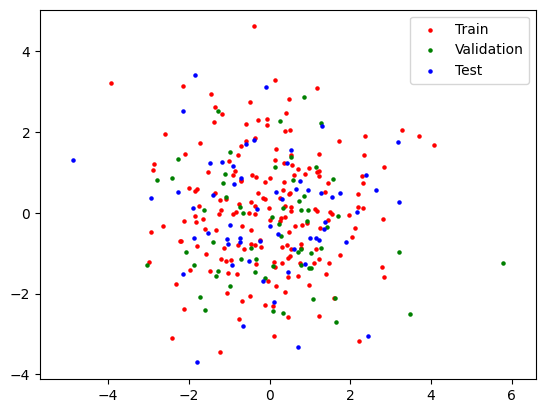

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], s=5, color = 'red', label = 'Train')
plt.scatter(x_val[:,0], x_val[:,1], s=5, color = 'green', label = 'Validation')
plt.scatter(x_test[:,0], x_test[:,1], s=5, color = 'blue', label = 'Test')
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
in_d = np.shape(x_train)[1]
out_d = np.shape(y_train)[1]

hidden1_d = 100

#initialize weights in ANN (2 input dim, 1 hidden layer with dimension of 2, 1 output dim)
w1, w2 = randn(in_d, hidden1_d), randn(hidden1_d, out_d)
b1, b2 = randn(1, hidden1_d), randn(1, out_d)

In [ ]:
lr = 1e-4 #learning rate
for t in range(40000):
    # Forward pass
    s = 1 / (1 + np.exp(-(x_train.dot(w1) + b1)))  # Choose activation function (e.g.: sigmoid)
    y_pred = s.dot(w2) + b2
    loss = np.square(y_pred - y_train).sum()



    # Backpropagation
    dy_pred = 2 * (y_pred - y_train)
    dw2 = s.T.dot(dy_pred)
    db2 = np.sum(dy_pred, axis=0)  # Gradient for b2
    dh = dy_pred.dot(w2.T)
    dw1 = x_train.T.dot(dh * s * (1 - s))  # Gradient for w1
    db1 = np.sum(dh * s * (1 - s), axis=0)  # Gradient for b1

    # Update weights and biases
    w1 -= lr * dw1
    w2 -= lr * dw2
    b1 -= lr * db1
    b2 -= lr * db2

    if t % 100 == 0:
      s = 1 / (1 + np.exp(-(x_train.dot(w1) + b1)))
      train_loss = loss = np.square(s.dot(w2) + b2 - y_train).sum()

      s = 1 / (1 + np.exp(-(x_val.dot(w1) + b1)))
      val_loss = np.square(s.dot(w2) + b2 - y_val).sum()
      print(t, train_loss, val_loss)

0 3374.6380137835085 1080.2283617268547
100 1219.2008270818767 639.5393996825309
200 1152.7055846162523 672.6494390888896
300 1105.7341104589404 679.9155813683959
400 1062.4605274327366 678.9935936970905
500 1018.6158289708961 674.6454864453074
600 973.6192187406713 667.6354641257828
700 928.4151851517292 659.5929447371578
800 883.6897175419676 652.5771915842237
900 839.7186408689764 647.0166765505354
1000 796.4104604820661 642.4507385781012
1100 753.8712498671284 638.6082046800163
1200 712.3990377368398 635.4298998381263
1300 672.3382525320626 632.9270305862881
1400 633.9950447747933 631.1271959531928
1500 597.6030479941194 630.0680646386838
1600 563.3163803386619 629.8086570594329
1700 531.2196675773714 630.4437816690701
1800 501.34840725415177 632.0990158327484
1900 473.7078353868992 634.8758800286223
2000 448.2768693061727 638.7510128521347
2100 424.99810955421333 643.5104582153923
2200 403.77094322758387 648.8036280258876
2300 384.4586828291183 654.275480753971
2400 366.9042795291

In [ ]:
#Final evaluation for ANN using test dataset
s = 1 / (1 + np.exp(-(x_test.dot(w1) + b1)))
test_loss = np.square(s.dot(w2) + b2 - y_test).sum()

print(test_loss)

204.51363360175534


In [ ]:
print(w1)

[[ 0.972354    0.32774654  0.01031616  2.22423116 -0.34765999  0.31888449
  -0.73058984  1.11279178  0.14924862  4.92197829  0.04742123  0.25978799
   0.94401367  1.28656454 -0.20540022  0.2624022   2.22143673  0.19278898
  -0.55909204  1.03349238  2.647888   -0.64497811 -0.34265362  0.3733953
   1.08767531 -2.62305431 -0.30364301  0.43611853  1.97708234 -0.21249437
  -0.62157638  2.53970185 -3.86304746 -3.62114337  0.7844445  -0.92040283
  -0.36151474  0.82608519  0.35001041 -1.8489036  -1.8239683   1.34129339
   0.10082815 -0.23006209  1.61985114 -0.62147631 -2.34079623 -2.21421642
  -0.73836303  0.29492263  0.45516867  0.5796498  -2.31635992  1.18786062
  -0.2405638   1.19139167  0.54375748  0.26781311  1.39644392  0.37796629
   3.39406362  0.77272342  0.81169057  1.01987143 -0.50290276  1.25333855
  -0.71902929  2.3313056  -0.24814742 -2.1336926  -0.41149009 -0.72801086
   0.98061183 -0.9340285  -1.15311627 -1.63808733 -0.77644011 -2.32484982
  -3.441174    0.98057056  0.39083805 -

In [ ]:
print(b1)

[[ 0.34596791 -4.25633975 -1.45012003  0.43439521  0.02393777 -0.07861787
  -1.97978535 -1.54273302 -2.58658892  4.35623918 -1.14137259 -0.69474181
  -3.36822586  1.12568392 -0.41097662  1.29560564 -3.16804308  0.52121311
  -0.83749167  6.12892079 -2.61351851  0.51341609  0.56902338  0.99420291
  -1.64316761  0.19901     0.02848449 -0.27717777  1.53497324  2.98156379
  -0.6388408  -0.53719225 -1.75284816  4.22240089 -1.45915946  3.28365979
   4.64210555 -2.54534387  0.60765367  2.55389714 -0.85420153 -0.92079343
  -0.82199112 -1.02063916 -0.84376164 -2.1395108   0.25086776 -1.91888261
   2.34506963 -3.84992842  1.11817482  6.07410062 -4.31214405  1.01131219
   3.30328833 -1.37422928  3.25700482  2.85381107 -1.42463136 -0.09492033
   3.15052451  3.94877502  1.76525956 -2.58459008  0.41566372 -7.9505843
  -1.667992   -2.25011237 -0.8634459   1.50930754  1.09895891  1.21372745
  -1.13347804 -0.37834264  2.97286772  0.54604125  4.91450154  0.39230737
  -2.29789643 -1.15276035  0.02265222 -